In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
real_df = pd.read_csv("Data/Real_Datasets/wine_processed_dedu.csv")
GCoplua_df = pd.read_csv('Data/Synthetic_Datasets/GaussianCopula/fake_run_1.csv')

In [3]:
print('Gaussian Copula Dataset')
display(GCoplua_df.head())

Gaussian Copula Dataset


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,1.039749,1.004017,1.055336,-0.395798,1.348501,0.344060,-0.941913,0.589837,-0.330237,0.991021,-0.540950,-0.759820,white
1,0.972506,0.046562,-0.087404,-0.159550,0.669439,0.107332,1.030469,0.882960,1.015101,0.012334,-0.650517,0.072293,white
2,0.127717,-1.248825,-0.370119,1.249495,-0.349525,1.017938,1.005862,0.340639,-0.252491,-0.625682,-0.528996,1.687124,white
3,1.586424,0.116237,0.619373,0.202877,0.130732,-1.181850,-1.024977,0.077426,-1.227280,0.028401,0.802275,1.361868,white
4,0.799460,1.374176,-1.268400,-0.294568,-0.917888,-0.644585,0.302906,0.584057,1.316031,-0.247075,0.579074,-0.923632,white


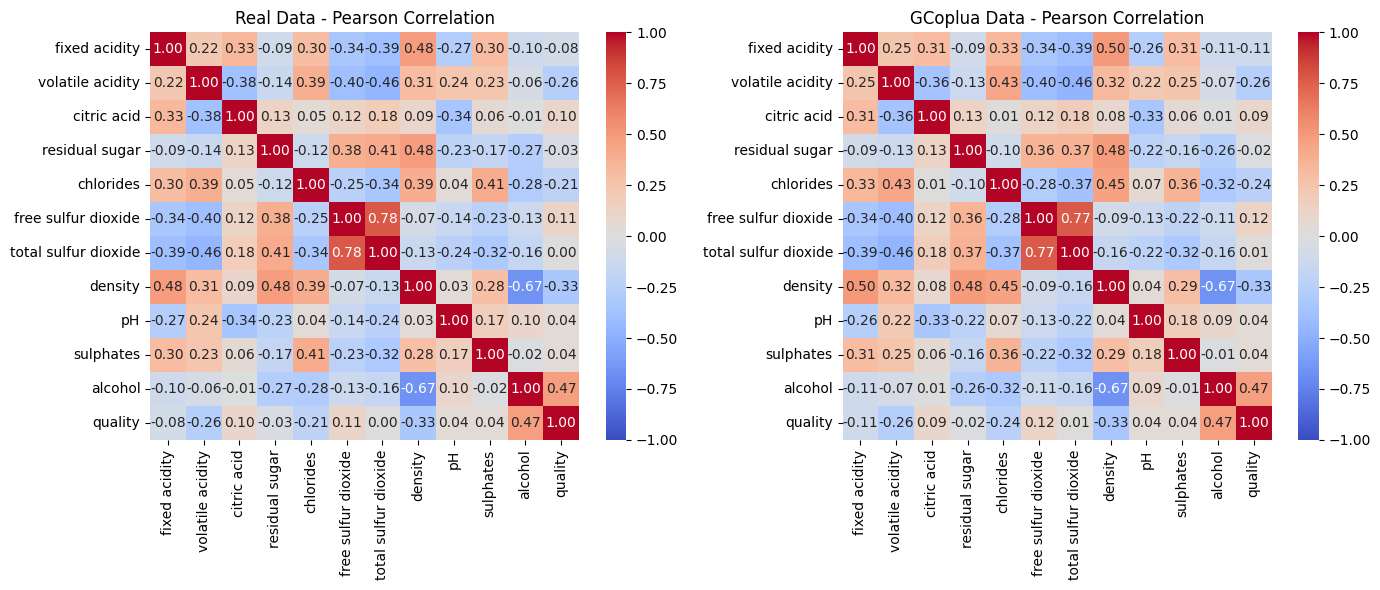

In [4]:
real_num = real_df.select_dtypes(include='number')
GCoplua_num = GCoplua_df.select_dtypes(include='number')

real_pearson = real_num.corr(method='pearson')
GCoplua_pearson = GCoplua_num.corr(method='pearson')

plt.figure(figsize=(14, 6))

# Original data
plt.subplot(1, 2, 1)
sns.heatmap(real_pearson, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Real Data - Pearson Correlation')

# Synthesized data
plt.subplot(1, 2, 2)
sns.heatmap(GCoplua_pearson, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('GCoplua Data - Pearson Correlation')

plt.tight_layout()
plt.show()

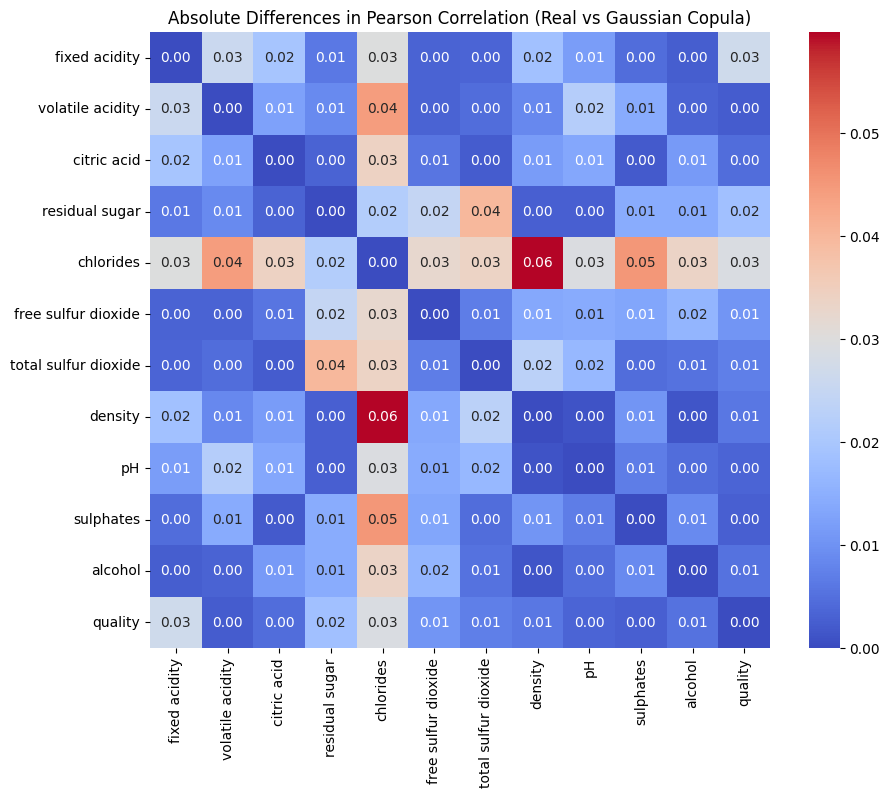

In [5]:
diff_GCoplua = (real_pearson - GCoplua_pearson).abs()
plt.figure(figsize=(10, 8))
sns.heatmap(diff_GCoplua, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Absolute Differences in Pearson Correlation (Real vs Gaussian Copula)")
plt.show()

In [6]:
# Compute absolute differences (you already have diff_df)
abs_diff = diff_GCoplua.abs()

# Mean absolute difference (off-diagonal)
vals = abs_diff.values[np.triu_indices_from(abs_diff, k=1)]
print("Mean absolute Pearson diff:", round(vals.mean(), 4))

# Find top 3 biggest drifts
pairs = []
for i, j in zip(*np.triu_indices_from(abs_diff, k=1)):
    pairs.append((abs_diff.iloc[i, j], diff_GCoplua.columns[i], diff_GCoplua.columns[j]))
top3 = sorted(pairs, reverse=True)[:3]
print("Top 3 biggest correlation shifts:")
for diff, f1, f2 in top3:
    print(f"  {f1!r} vs {f2!r}: Δ = {diff:.2f}")

Mean absolute Pearson diff: 0.0143
Top 3 biggest correlation shifts:
  'chlorides' vs 'density': Δ = 0.06
  'chlorides' vs 'sulphates': Δ = 0.05
  'volatile acidity' vs 'chlorides': Δ = 0.04


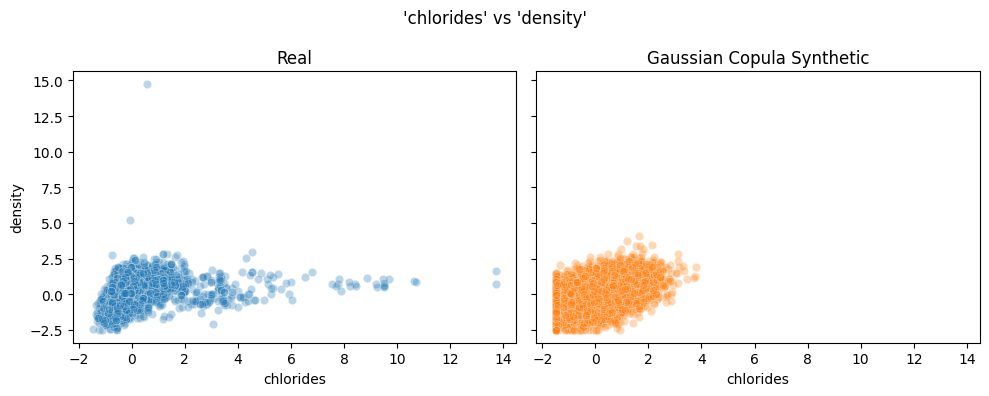

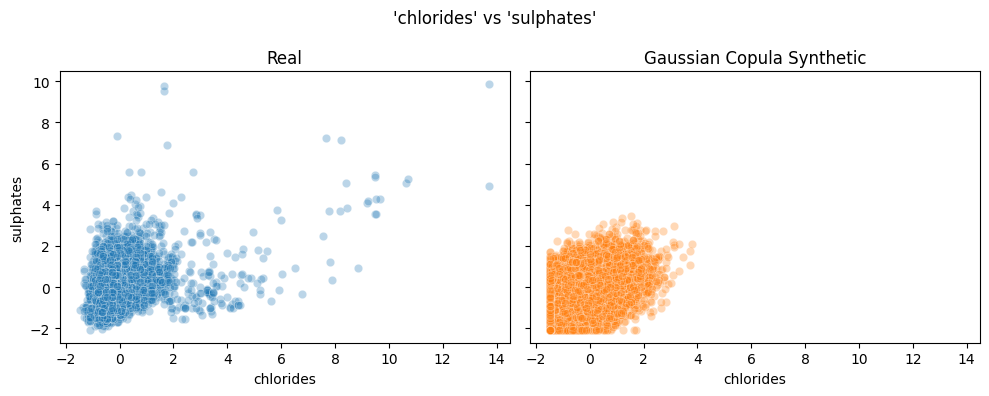

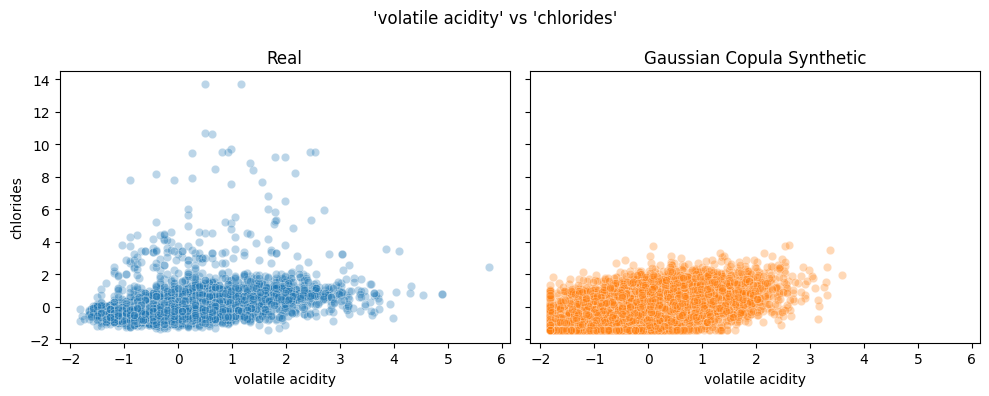

In [7]:
for x,y in [("chlorides","density"),
            ("chlorides","sulphates"),
            ("volatile acidity","chlorides")]:
    fig, axes = plt.subplots(1,2,figsize=(10,4), sharex=True, sharey=True)
    sns.scatterplot(data=real_df, x=x, y=y, ax=axes[0], alpha=0.3)
    axes[0].set_title("Real")
    sns.scatterplot(data=GCoplua_df, x=x, y=y, ax=axes[1], alpha=0.3, color="C1")
    axes[1].set_title("Gaussian Copula Synthetic")
    plt.suptitle(f"{x!r} vs {y!r}")
    plt.tight_layout()
    plt.show()

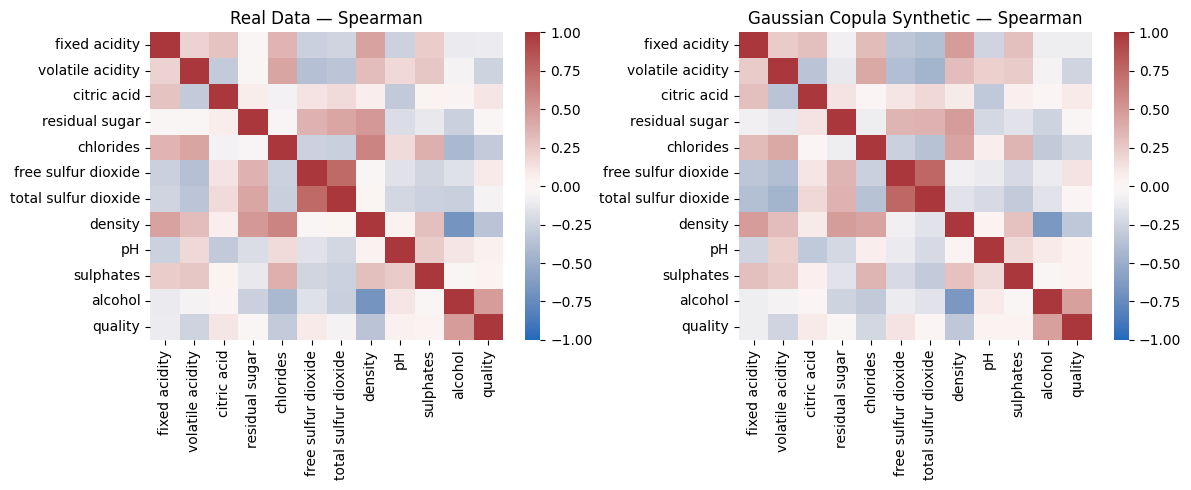

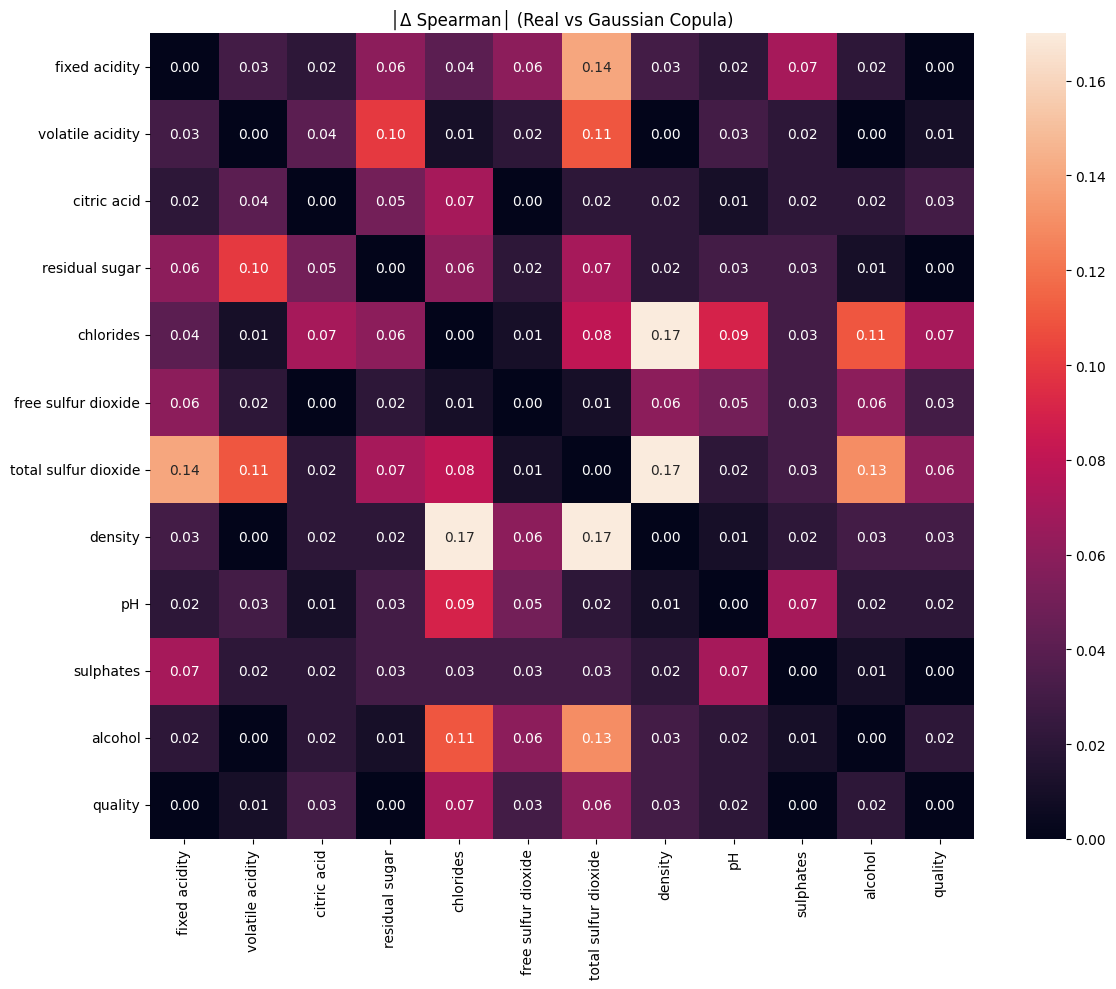

In [8]:
# Spearman correlation matrices
real_spear = real_num.corr(method="spearman")
GCoplua_spear  = GCoplua_num.corr(method="spearman")   # keep typo name but ensure GCoplua_num exists

# 4) Plot side by side
fig, axes = plt.subplots(1,2,figsize=(12,5), tight_layout=True)
sns.heatmap(real_spear, vmin=-1, vmax=1, center=0, cmap="vlag", ax=axes[0])
axes[0].set_title("Real Data — Spearman")

sns.heatmap(GCoplua_spear, vmin=-1, vmax=1, center=0, cmap="vlag", ax=axes[1])
axes[1].set_title("Gaussian Copula Synthetic — Spearman")
plt.show()

# 5) Compute & plot absolute difference
diff_GCoplua = (GCoplua_spear - real_spear).abs().round(2)   # fixed: use diff_GCoplua consistently
plt.figure(figsize=(12,10))
sns.heatmap(diff_GCoplua, vmin=0, vmax=diff_GCoplua.values.max(),
            cmap="rocket", annot=True, fmt=".2f")
plt.title("│Δ Spearman│ (Real vs Gaussian Copula)")
plt.tight_layout()
plt.show()



In [11]:
import numpy as np

# Pearson diff
diff_pearson = (real_pearson - GCoplua_pearson).abs()
pearson_mae = diff_pearson.values[np.triu_indices_from(diff_pearson, k=1)].mean()
print("Pearson MAE:", pearson_mae)

# Spearman diff
diff_spear = (real_spear - GCoplua_spear).abs()
spearman_mae = diff_spear.values[np.triu_indices_from(diff_spear, k=1)].mean()
print("Spearman MAE:", spearman_mae)


Pearson MAE: 0.014336679642209608
Spearman MAE: 0.04211451266996413


In [12]:
import numpy as np

# 1- fast distance covariance
def fast_dcov(x, y):
    x = np.asarray(x).flatten()
    y = np.asarray(y).flatten()
    n = len(x)
    
    # Sort x
    idx = np.argsort(x)
    x = x[idx]
    y = y[idx]
    
    # Row sums of distance matrix of x
    si = np.cumsum(x)
    s = si[-1]
    ax = (-(n-2) + 2*np.arange(n)) * x + (s - 2*si)
    
    # Weight matrix
    v = np.column_stack((x, y, x*y))
    nw = v.shape[1]
    
    idx_buf = np.zeros((n, 2), dtype=int)
    idx_buf[:, 0] = np.arange(n)
    
    iv1 = np.zeros(n)
    iv2 = np.zeros(n)
    iv3 = np.zeros(n)
    iv4 = np.zeros(n)
    
    i = 1
    r, s_idx = 0, 1
    while i < n:
        gap = 2 * i
        k = 0
        idxr = idx_buf[:, r]
        csumv = np.vstack([np.zeros((1, nw)), np.cumsum(v[idxr], axis=0)])
        
        for j in range(0, n, gap):
            st1 = j
            e1 = min(st1 + i - 1, n-1)
            st2 = j + i
            e2 = min(st2 + i - 1, n-1)
            
            while st1 <= e1 and st2 <= e2:
                idx1 = idxr[st1]
                idx2 = idxr[st2]
                if y[idx1] >= y[idx2]:
                    idx_buf[k, s_idx] = idx1
                    st1 += 1
                else:
                    idx_buf[k, s_idx] = idx2
                    iv1[idx2] += e1 - st1 + 1
                    iv2[idx2] += csumv[e1+1, 0] - csumv[st1, 0]
                    iv3[idx2] += csumv[e1+1, 1] - csumv[st1, 1]
                    iv4[idx2] += csumv[e1+1, 2] - csumv[st1, 2]
                    st2 += 1
                k += 1
            
            # Copy leftovers
            if st1 <= e1:
                idx_buf[k:k+e1-st1+1, s_idx] = idxr[st1:e1+1]
                k += e1-st1+1
            elif st2 <= e2:
                idx_buf[k:k+e2-st2+1, s_idx] = idxr[st2:e2+1]
                k += e2-st2+1
                
        i = gap
        r, s_idx = s_idx, r
    
    covterm = n * np.sum((x - np.mean(x)) * (y - np.mean(y)))
    c1 = np.dot(iv1, v[:, 2])
    c2 = np.sum(iv4)
    c3 = np.dot(iv2, y)
    c4 = np.dot(iv3, x)
    d = 4 * ((c1 + c2) - (c3 + c4)) - 2 * covterm
    
    ySorted = y[idx_buf[n-1::-1, r]]
    si_y = np.cumsum(ySorted)
    s_y = si_y[-1]
    by = np.zeros(n)
    by[idx_buf[n-1::-1, r]] = (-(n-2) + 2*np.arange(n)) * ySorted + (s_y - 2*si_y)
    
    nsq = n * n
    ncb = nsq * n
    nq = ncb * n
    term1 = d / nsq
    term2 = 2 * np.dot(ax, by) / ncb
    term3 = np.sum(ax) * np.sum(by) / nq
    
    covsq = (term1 + term3) - term2
    return covsq

#2 - distance correlation matrix for tabular data
def distance_correlation_matrix(data):
    data = np.asarray(data)
    n_features = data.shape[1]
    dcor_mat = np.zeros((n_features, n_features))

    for i in range(n_features):
        for j in range(i, n_features):
            x = data[:, i]
            y = data[:, j]
            dcov_xy = fast_dcov(x, y)
            dcov_xx = fast_dcov(x, x)
            dcov_yy = fast_dcov(y, y)
            dcor = np.sqrt(dcov_xy / np.sqrt(dcov_xx * dcov_yy)) if dcov_xx > 0 and dcov_yy > 0 else 0
            dcor_mat[i, j] = dcor
            dcor_mat[j, i] = dcor

    return dcor_mat


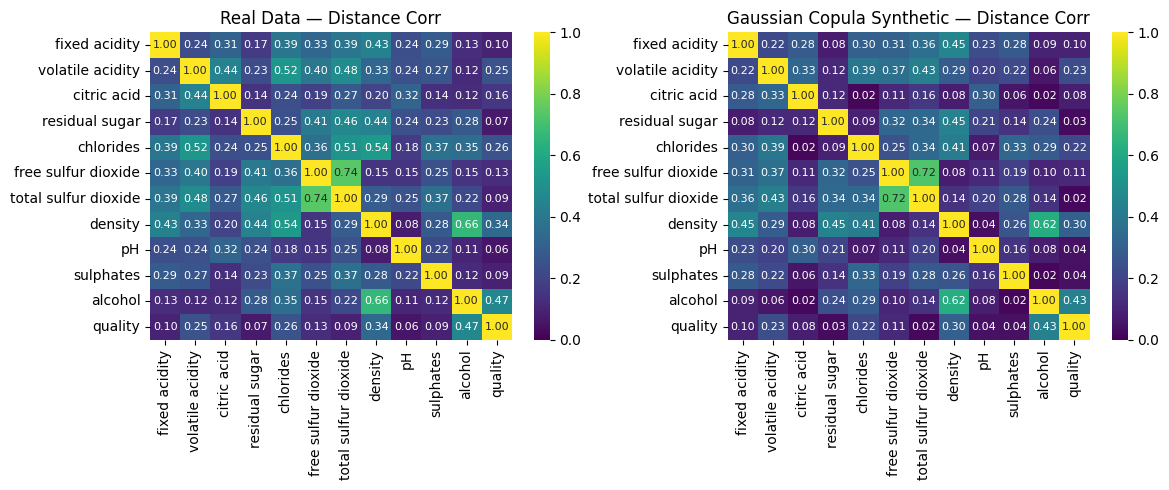

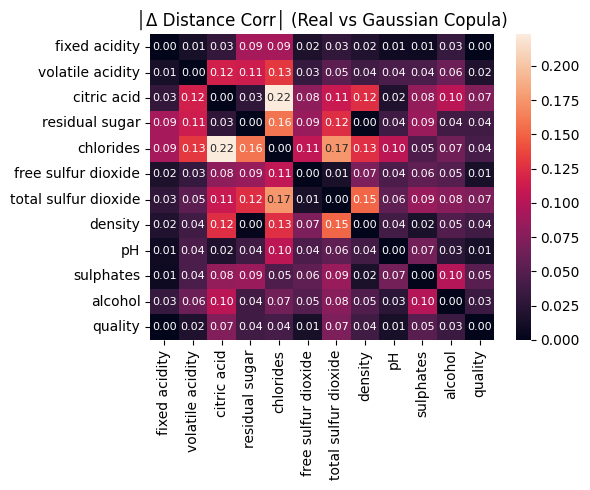

In [13]:
#  Compute distance correlation matrices for real and GCoplua 
real_dcor = distance_correlation_matrix(real_num.values)
GCoplua_dcor = distance_correlation_matrix(GCoplua_num.values)

real_dcor = pd.DataFrame(real_dcor, index=real_num.columns, columns=real_num.columns)
GCoplua_dcor = pd.DataFrame(GCoplua_dcor, index=GCoplua_num.columns, columns=GCoplua_num.columns)

# --- Plot side by side ---
fig, axes = plt.subplots(1, 2, figsize=(12,5), tight_layout=True)
sns.heatmap(real_dcor, vmin=0, vmax=1, cmap="viridis", annot=True, fmt=".2f",
            annot_kws={"size":8}, ax=axes[0])
axes[0].set_title("Real Data — Distance Corr")

sns.heatmap(GCoplua_dcor, vmin=0, vmax=1, cmap="viridis", annot=True, fmt=".2f",
            annot_kws={"size":8}, ax=axes[1])
axes[1].set_title("Gaussian Copula Synthetic — Distance Corr")

plt.show()

#  Difference heatmap 
diff_GCoplua_dcor = (real_dcor - GCoplua_dcor).abs().round(3)
plt.figure(figsize=(6,5))
sns.heatmap(diff_GCoplua_dcor, vmin=0, vmax=diff_GCoplua_dcor.values.max(),
            cmap="rocket", annot=True, fmt=".2f", annot_kws={"size":8})
plt.title("│Δ Distance Corr│ (Real vs Gaussian Copula)")
plt.tight_layout()
plt.show()


In [14]:
# MAE for distance correlation (GCoplua)
vals = diff_GCoplua_dcor.values[np.triu_indices_from(diff_GCoplua_dcor, k=1)]
mae_dcor = vals.mean()
print("Mean absolute Distance Corr diff (GCoplua, MAE):", round(mae_dcor, 3))


Mean absolute Distance Corr diff (GCoplua, MAE): 0.063


In [15]:
# Top 3 Pearson shifts (GCoplua) 
abs_diff = (GCoplua_pearson - real_pearson).abs()

records = []
for i, j in zip(*np.triu_indices_from(abs_diff, k=1)):
    records.append({
        "Metric": "Pearson",
        "Pair": f"{abs_diff.columns[i]} – {abs_diff.columns[j]}",
        "Real": real_pearson.iloc[i, j],
        "Fake": GCoplua_pearson.iloc[i, j],
        "Abs Δ": abs_diff.iloc[i, j]
    })

GCoplua_pearson_top3 = sorted(records, key=lambda x: x["Abs Δ"], reverse=True)[:3]

# Pretty print
print("\nTop 3 biggest Pearson shifts (GCoplua):")
for r in GCoplua_pearson_top3:
    print(r)



Top 3 biggest Pearson shifts (GCoplua):
{'Metric': 'Pearson', 'Pair': 'chlorides – density', 'Real': 0.3937612362620235, 'Fake': 0.4535449582918079, 'Abs Δ': 0.059783722029784436}
{'Metric': 'Pearson', 'Pair': 'chlorides – sulphates', 'Real': 0.40624846212878213, 'Fake': 0.36101527322402777, 'Abs Δ': 0.04523318890475436}
{'Metric': 'Pearson', 'Pair': 'volatile acidity – chlorides', 'Real': 0.39013285977498213, 'Fake': 0.4343907274515408, 'Abs Δ': 0.04425786767655865}


In [16]:
#  Top 3 Spearman shifts (GCoplua) 
abs_diff = (GCoplua_spear - real_spear).abs()

records = []
for i, j in zip(*np.triu_indices_from(abs_diff, k=1)):
    records.append({
        "Metric": "Spearman",
        "Pair": f"{abs_diff.columns[i]} – {abs_diff.columns[j]}",
        "Real": real_spear.iloc[i, j],
        "Fake": GCoplua_spear.iloc[i, j],
        "Abs Δ": abs_diff.iloc[i, j]
    })

GCoplua_spear_top3 = sorted(records, key=lambda x: x["Abs Δ"], reverse=True)[:3]

# Pretty print
print("\nTop 3 biggest Spearman shifts (GCoplua):")
for r in GCoplua_spear_top3:
    print(r)



Top 3 biggest Spearman shifts (GCoplua):
{'Metric': 'Spearman', 'Pair': 'total sulfur dioxide – density', 'Real': 0.021692210850135177, 'Fake': -0.1500470161439033, 'Abs Δ': 0.17173922699403849}
{'Metric': 'Spearman', 'Pair': 'chlorides – density', 'Real': 0.6088020852764504, 'Fake': 0.4399716434076142, 'Abs Δ': 0.16883044186883622}
{'Metric': 'Spearman', 'Pair': 'fixed acidity – total sulfur dioxide', 'Real': -0.247379078239813, 'Fake': -0.38271904715420724, 'Abs Δ': 0.13533996891439423}


In [17]:
# Top 3 Distance Corr shifts (GCoplua) 
records = []
for i, j in zip(*np.triu_indices_from(diff_GCoplua_dcor, k=1)):
    records.append({
        "Metric": "Distance Corr",
        "Pair": f"{diff_GCoplua_dcor.columns[i]} – {diff_GCoplua_dcor.columns[j]}",
        "Real": real_dcor.iloc[i, j],
        "Fake": GCoplua_dcor.iloc[i, j],
        "Abs Δ": diff_GCoplua_dcor.iloc[i, j]
    })

GCoplua_dcor_top3 = sorted(records, key=lambda x: x["Abs Δ"], reverse=True)[:3]

# Pretty print
print("\nTop 3 biggest Distance Corr shifts (GCoplua):")
for r in GCoplua_dcor_top3:
    print(r)



Top 3 biggest Distance Corr shifts (GCoplua):
{'Metric': 'Distance Corr', 'Pair': 'citric acid – chlorides', 'Real': 0.2411337310204256, 'Fake': 0.018481118638914627, 'Abs Δ': 0.223}
{'Metric': 'Distance Corr', 'Pair': 'chlorides – total sulfur dioxide', 'Real': 0.5136693996372496, 'Fake': 0.3391487411296422, 'Abs Δ': 0.175}
{'Metric': 'Distance Corr', 'Pair': 'residual sugar – chlorides', 'Real': 0.2495544738013575, 'Fake': 0.09151658206167498, 'Abs Δ': 0.158}


In [18]:
from tabulate import tabulate
import pandas as pd

def pretty_print_tool_table(tool_name, metrics_dict):
    rows = []
    for metric, records in metrics_dict.items():
        df = pd.DataFrame(records)
        df = df[["Pair", "Real", "Fake", "Abs Δ"]]

        for idx, row in df.iterrows():
            rows.append([
                tool_name if idx == df.index[0] and metric == list(metrics_dict.keys())[0] else "",
                metric if idx == df.index[0] else "",
                row["Pair"],
                f"{row['Real']:.3f}",
                f"{row['Fake']:.3f}",
                f"{row['Abs Δ']:.3f}"
            ])
        rows.append(["", "-"*10, "-"*20, "-"*5, "-"*5, "-"*5])

    headers = ["Tool", "Metric", "Pair", "Real", "Fake", "Abs Δ"]
    print(tabulate(rows, headers=headers, tablefmt="pretty"))

# Collect all 3 for GCoplua
GCoplua_top3 = {
    "Pearson": GCoplua_pearson_top3,
    "Spearman": GCoplua_spear_top3,
    "Distance Corr": GCoplua_dcor_top3
}

# Print grouped table
pretty_print_tool_table("GCoplua", GCoplua_top3)


+---------+---------------+--------------------------------------+--------+--------+-------+
|  Tool   |    Metric     |                 Pair                 |  Real  |  Fake  | Abs Δ |
+---------+---------------+--------------------------------------+--------+--------+-------+
| GCoplua |    Pearson    |         chlorides – density          | 0.394  | 0.454  | 0.060 |
|         |               |        chlorides – sulphates         | 0.406  | 0.361  | 0.045 |
|         |               |     volatile acidity – chlorides     | 0.390  | 0.434  | 0.044 |
|         |  ----------   |         --------------------         | -----  | -----  | ----- |
|         |   Spearman    |    total sulfur dioxide – density    | 0.022  | -0.150 | 0.172 |
|         |               |         chlorides – density          | 0.609  | 0.440  | 0.169 |
|         |               | fixed acidity – total sulfur dioxide | -0.247 | -0.383 | 0.135 |
|         |  ----------   |         --------------------         | ---

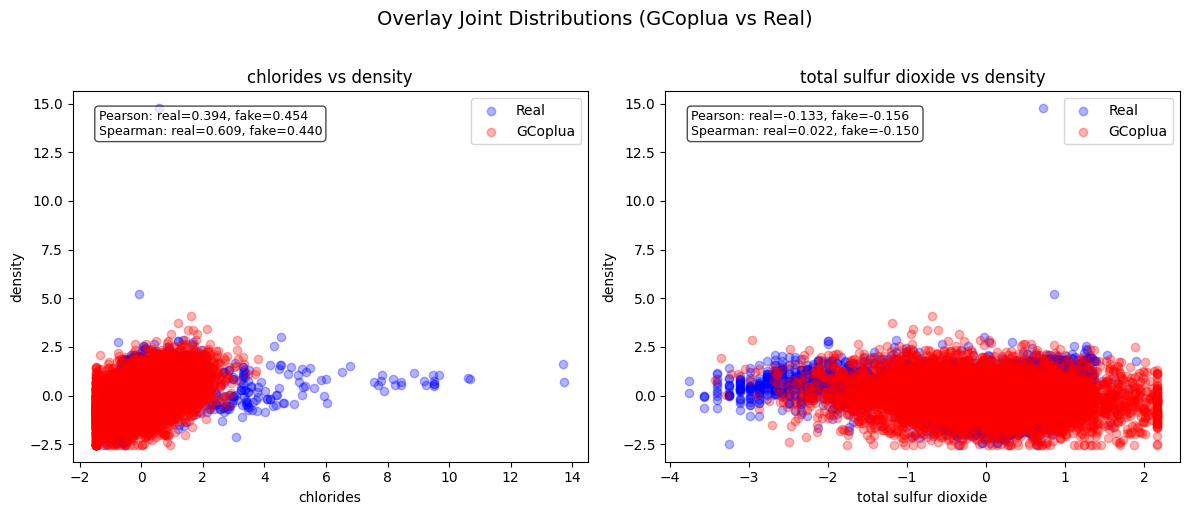

In [19]:
from scipy.stats import spearmanr

pairs = [
    ("chlorides", "density"),
    ("total sulfur dioxide", "density")
]

fig, axes = plt.subplots(1, len(pairs), figsize=(6*len(pairs), 5), tight_layout=True)

for idx, (f1, f2) in enumerate(pairs):
    # --- Scatter overlay ---
    axes[idx].scatter(real_num[f1], real_num[f2], alpha=0.3, color="blue", label="Real")
    axes[idx].scatter(GCoplua_num[f1], GCoplua_num[f2], alpha=0.3, color="red", label="GCoplua")

    axes[idx].set_title(f"{f1} vs {f2}")
    axes[idx].set_xlabel(f1)
    axes[idx].set_ylabel(f2)

    # --- Compute correlations ---
    pear_real = real_num[[f1, f2]].corr(method="pearson").iloc[0,1]
    pear_fake = GCoplua_num[[f1, f2]].corr(method="pearson").iloc[0,1]
    spear_real, _ = spearmanr(real_num[f1], real_num[f2])
    spear_fake, _ = spearmanr(GCoplua_num[f1], GCoplua_num[f2])

    # --- Annotate correlations on plot ---
    textstr = (f"Pearson: real={pear_real:.3f}, fake={pear_fake:.3f}\n"
               f"Spearman: real={spear_real:.3f}, fake={spear_fake:.3f}")
    axes[idx].text(0.05, 0.95, textstr, transform=axes[idx].transAxes,
                   fontsize=9, va="top", ha="left",
                   bbox=dict(boxstyle="round", facecolor="white", alpha=0.7))

    axes[idx].legend()

plt.suptitle("Overlay Joint Distributions (GCoplua vs Real)", fontsize=14, y=1.02)
plt.show()
